# Rimbesougri KABORE
## G2M insight for Cab Investment firm

# Table
* [Context](#Context)
* [Libraries import](#Libraries)
* [Datasets](#Datasets)
    * [Cab_Data](#Cab_Data)
    * [City_Data](#City_Data)
    * [Customer_Data](#Customer_Data)
    * [Transaction_Data](#Transaction_Data)
* [Relationship across the files](#FilesRelationship)
* [Master Dataset](#Final_Dataset)  
* [Hypothesis](#Hypothesis)
    * [1.Hypothesis 1](#Hypothesis_1)  
    * [2.Hypothesis 2](#Hypothesis_2) 
    * [3.Hypothesis 3](#Hypothesis_3)  
    * [4.Hypothesis 4](#Hypothesis_4)  
    * [5.Hypothesis 5](#Hypothesis_5)  
    * [6.Hypothesis 6](#Hypothesis_6)  
* [EDA recommendation](#Recos)

# Context <a class="anchor" id="Context"></a>

*XYZ* is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

# Libraries import <a class="anchor" id="Libraries"></a>

In [1]:
import pandas as pd
import datetime
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from data_descriptive import * # Personal library

# Datasets <a class="anchor" id="Datasets"></a>

In [2]:
source = "G2M Cab DataSets/"

Cab_Data = pd.read_csv(source+"Cab_Data.csv", sep=";")
City_Data = pd.read_csv(source+"City.csv", sep=";")
Customer_Data = pd.read_csv(source+"Customer_ID.csv", sep=";")
Transaction_Data = pd.read_csv(source+"Transaction_ID.csv", sep=";")

datasets = {"Cab_Data":Cab_Data, "City_Data":City_Data, 
            "Customer_Data":Customer_Data, "Transaction_Data":Transaction_Data
           }

for x in datasets :
    print(x)
    print( datasets[x].info() )
    print( datasets[x][datasets[x].duplicated()].count() )
    print()
    

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

Cab_Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None
Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

City_Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Populati

## Cab_Data <a class="anchor" id="Cab_Data"></a>

Presents details about the transactions of two cab companies : **Pink Cab** and **Yellow Cab**.<br>
The time period of the data is from *01/02/2016* to *12/31/2018*


In [3]:
Cab_Data.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854


The **Date of Travel** feature is formatted as an *int* : it seems like it is formatted in Excel format. We need to convert it in a more readable format (*YYYY-MM-DD*)

In [4]:
Cab_Data["Date of Travel"] = Cab_Data["Date of Travel"].apply( lambda x : datetime.datetime(1899, 12, 30) + datetime.timedelta(days=x) )
Cab_Data["Year of Travel"] = Cab_Data["Date of Travel"].dt.year
Cab_Data["Month of Travel"] = Cab_Data["Date of Travel"].dt.month
Cab_Data["Weekday of Travel"] = Cab_Data["Date of Travel"].dt.weekday + 1
Cab_Data["Weekday name of Travel"] = Cab_Data["Date of Travel"].dt.weekday.apply(lambda x : days[x])

We then add, others economical features like *Gross Profit* and *Margin* which will help us to understand the rentability of these *Companies*

In [5]:
Cab_Data["Gross Profit"] = Cab_Data["Price Charged"] - Cab_Data["Cost of Trip"] 
Cab_Data["Margin"] = Cab_Data["Gross Profit"]/Cab_Data["Price Charged"]
Cab_Data["Price per KM"] = Cab_Data["Price Charged"]/Cab_Data["KM Travelled"]
Cab_Data["Cost per KM"] = Cab_Data["Cost of Trip"]/Cab_Data["KM Travelled"]
Cab_Data["Profit per KM"] = Cab_Data["Gross Profit"]/Cab_Data["KM Travelled"]

,Dtype,Count,Missing_Values,% Missing_Values
City,object,359392,0,0.0
Company,object,359392,0,0.0
Cost of Trip,float64,359392,0,0.0
Cost per KM,float64,359392,0,0.0
Date of Travel,datetime64[ns],359392,0,0.0
Gross Profit,float64,359392,0,0.0
KM Travelled,float64,359392,0,0.0
Margin,float64,359392,0,0.0
Month of Travel,int64,359392,0,0.0
Price Charged,float64,359392,0,0.0


,count,range,IQR,mode,mad,kurtosis,skewness,mean,std,min,25%,50%,75%,max
Cost of Trip,359392,672.20,262.48,362.88,131.23,-1.01,0.14,286.19,157.99,19.00,151.20,282.48,413.68,691.20
Cost per KM,359392,4.40,1.68,12.00,0.84,-0.57,-0.52,12.68,1.17,10.00,12.00,12.84,13.68,14.40
Gross Profit,359392,1684.03,162.02,31.00,65.69,4.38,1.90,137.25,160.31,-220.06,28.01,81.96,190.03,1463.97
KM Travelled,359392,46.10,20.96,33.60,10.45,-1.13,0.06,22.57,12.23,1.90,12.00,22.44,32.96,48.00
Margin,359392,1.46,0.28,0.28,0.14,-0.46,-0.10,0.27,0.19,-0.69,0.14,0.26,0.42,0.76
Month of Travel,359392,11.00,5.00,12.00,3.00,-1.05,-0.40,7.50,3.45,1.00,5.00,8.00,10.00,12.00
Price Charged,359392,2032.43,377.22,298.32,187.22,0.75,0.87,423.44,274.38,15.60,206.44,386.36,583.66,2048.03
Price per KM,359392,47.62,7.78,17.00,3.38,0.53,0.97,18.77,5.88,6.34,14.45,17.15,22.23,53.96
Profit per KM,359392,46.11,7.17,2.50,3.07,0.82,1.09,6.08,5.54,-5.00,2.00,4.47,9.17,41.12
Weekday of Travel,359392,6.00,2.00,5.00,1.00,-0.70,-0.61,4.75,1.86,1.00,4.00,5.00,6.00,7.00


array([[<AxesSubplot:title={'center':'Cost of Trip'}>,
        <AxesSubplot:title={'center':'Cost per KM'}>,
        <AxesSubplot:title={'center':'Gross Profit'}>],
       [<AxesSubplot:title={'center':'KM Travelled'}>,
        <AxesSubplot:title={'center':'Margin'}>,
        <AxesSubplot:title={'center':'Month of Travel'}>],
       [<AxesSubplot:title={'center':'Price Charged'}>,
        <AxesSubplot:title={'center':'Price per KM'}>,
        <AxesSubplot:title={'center':'Profit per KM'}>],
       [<AxesSubplot:title={'center':'Weekday of Travel'}>,
        <AxesSubplot:title={'center':'Year of Travel'}>, <AxesSubplot:>]],
      dtype=object)

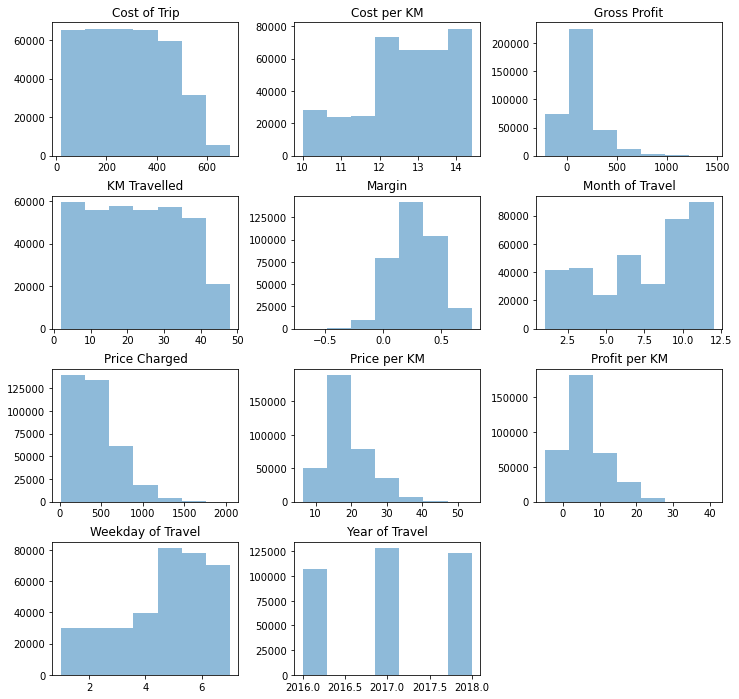

In [6]:
IDs = ["Customer ID", "Transaction ID"]
display( Missing_values(Cab_Data) )

display( Statistical_description(Cab_Data.loc[:, ~Cab_Data.columns.isin(IDs)]) )


temp_df = Cab_Data.loc[:, ~Cab_Data.columns.isin(IDs)]
temp_df = temp_df[sorted(temp_df.columns.tolist())]
temp_df = temp_df[numeric_cols(temp_df)]
temp_df.hist(bins=7, alpha=0.5,figsize=[12,12],grid=False) if len(numeric_cols(temp_df)) > 0 else "no numeric column to plot"

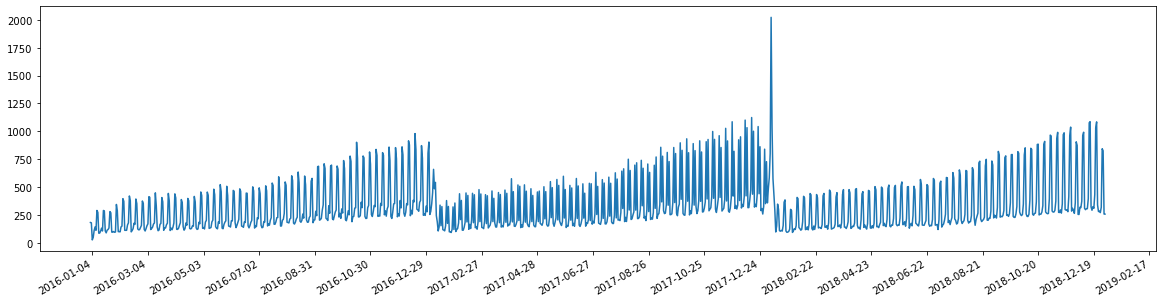

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt

df = Cab_Data.groupby('Date of Travel').agg({'Transaction ID':len}).reset_index()
x = df['Date of Travel']
y = df['Transaction ID']

plt.figure(figsize=(20, 5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
plt.plot(x,y)
plt.gcf().autofmt_xdate()
plt.show()

The distribution of the transactions according to the *date of travel* looks like a *time serie* with these properties :
- **Periodicity :** 1 year
- **Slope :** Positive
- **Noise :** High

City
Cardinality : ['ATLANTA GA' 'AUSTIN TX' 'BOSTON MA' 'CHICAGO IL' 'DALLAS TX' 'DENVER CO'
 'LOS ANGELES CA' 'MIAMI FL' 'NASHVILLE TN' 'NEW YORK NY' 'ORANGE COUNTY'
 'PHOENIX AZ' 'PITTSBURGH PA' 'SACRAMENTO CA' 'SAN DIEGO CA' 'SEATTLE WA'
 'SILICON VALLEY' 'TUCSON AZ' 'WASHINGTON DC']
Unique counts : 19


<AxesSubplot:ylabel='City'>

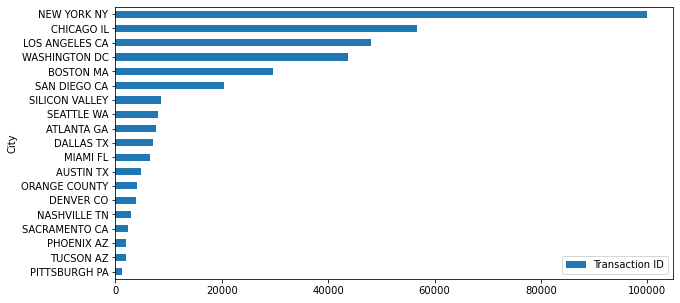

In [8]:
col = 'City'
Cardinality = Cab_Data[col].unique()
print(col)
print("Cardinality : {}".format(Cardinality) )
print("Unique counts : {}".format(len(Cardinality)) )

df = Cab_Data.pivot_table(values = ['Transaction ID'], index=['City'],
                          #columns=['Gender'],
                          aggfunc=len
                         )
df = df.sort_values('Transaction ID')
df.plot( kind='barh', rot=0, figsize=(10,5) )

**New YORK NY** is the city with the most cab transactions. *It looks like it is proportional to the size of its population*

Company
Cardinality : ['Pink Cab' 'Yellow Cab']
Unique counts : 2


<AxesSubplot:xlabel='Company'>

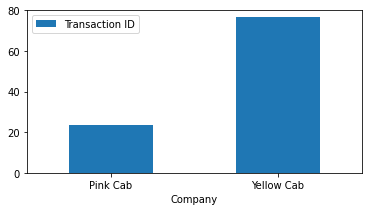

In [9]:
col = 'Company'
Cardinality = Cab_Data[col].unique()
print(col)
print("Cardinality : {}".format(Cardinality) )
print("Unique counts : {}".format(len(Cardinality)) )

df = 100*Cab_Data.pivot_table(values = ['Transaction ID'], index=['Company'],
                          #columns=['Gender'],
                          aggfunc=len
                         )/len(Cab_Data)
df = df.sort_values('Transaction ID')
df.plot( kind='bar', rot=0, figsize=(6,3) )

*Pink Cab* has far less transactions than *Yellow Cab* (near 79%)

## City_Data <a class="anchor" id="City_Data"></a>

You can find here, the list of US cities, their population and the number of cab users

In [10]:
City_Data.head(3)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"


In [11]:
display( Missing_values(City_Data) )

,Dtype,Count,Missing_Values,% Missing_Values
City,object,20,0,0.0
Population,object,20,0,0.0
Users,object,20,0,0.0


It seems that there is a problem in some features format : **Users** and **Population** are supposed to be numerical but they are formatted as *string*. <br>
To fix that, we will make a conversion of these :

In [12]:
for x in ["Population","Users"]:
    City_Data[x] = City_Data[x].apply(lambda x : x.replace(',','')).astype(int) 

It could be interesting to add a *ratio* of the *Cab users* according to the population of the city.

In [13]:
City_Data["Users ratio"] = City_Data["Users"]/City_Data["Population"]

,count,range,IQR,mode,mad,kurtosis,skewness,mean,std,min,25%,50%,75%,max
Population,20,8156869.00,458403.75,8405837.00,240628.50,13.03,3.75,1231592.00,1696065.71,248968.0,608637.25,784559.00,1067041.00,8405837.00
Users,20,301222.00,80689.25,302149.00,17506.50,1.45,1.54,64103.50,81688.07,927.0,11076.75,23429.00,91766.00,302149.00
Users ratio,20,0.34,0.06,0.04,0.01,1.45,1.77,0.07,0.11,0.0,0.01,0.02,0.08,0.34


array([[<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Users'}>],
       [<AxesSubplot:title={'center':'Users ratio'}>, <AxesSubplot:>]],
      dtype=object)

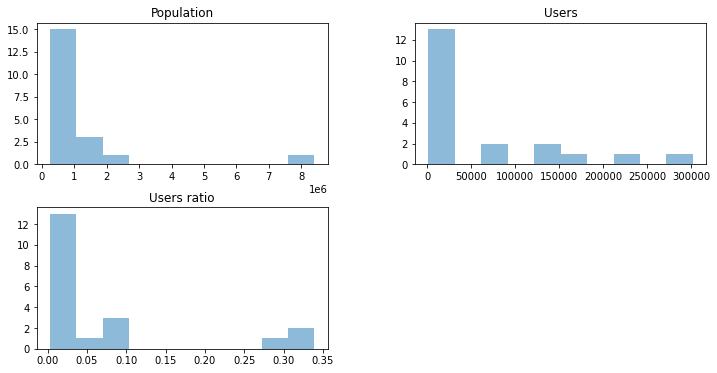

In [14]:
IDs = ["Customer ID", "Transaction ID"]
display( Statistical_description(City_Data.loc[:, ~City_Data.columns.isin(IDs)]) )

temp_df = City_Data.loc[:, ~City_Data.columns.isin(IDs)]
temp_df = temp_df[sorted(temp_df.columns.tolist())]
temp_df = temp_df[numeric_cols(temp_df)]
temp_df.hist(bins=10, alpha=0.5,figsize=[12,6],grid=False) if len(numeric_cols(temp_df)) > 0 else "no numeric column to plot"

The distribution here is **very skewed**. To make a prediction, this is not the best distribution of data that we should use. <br>
In order to fix that, we will make a transformation using *log* or *box-cox* functions

,count,range,IQR,mode,mad,kurtosis,skewness,mean,std,min,25%,50%,75%,max
Boxcox - Users ratio,20,8.20,2.98,-4.31,1.45,-0.53,0.04,-4.82,2.16,-9.38,-6.13,-5.04,-3.15,-1.17
Users ratio,20,0.34,0.06,0.04,0.01,1.45,1.77,0.07,0.11,0.00,0.01,0.02,0.08,0.34
log(Users ratio),20,4.79,1.77,-3.33,0.78,-0.57,0.43,-3.51,1.31,-5.87,-4.36,-3.76,-2.58,-1.08
sqrt(Users ratio),20,0.53,0.16,0.19,0.05,0.53,1.36,0.22,0.16,0.05,0.11,0.15,0.28,0.58


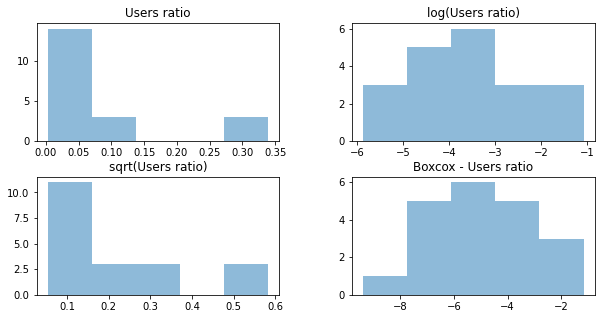

In [15]:
temp_df['log(Users ratio)'] = np.log( City_Data["Users ratio"] )
temp_df['sqrt(Users ratio)'] = np.sqrt( City_Data["Users ratio"] )
temp_df['Boxcox - Users ratio'] = pd.Series(stats.boxcox(City_Data["Users ratio"])[0])

display( Statistical_description(temp_df[['Users ratio','log(Users ratio)','sqrt(Users ratio)','Boxcox - Users ratio']]
                                ) )

if len(numeric_cols(temp_df)) > 0 :
    temp_df[['Users ratio','log(Users ratio)','sqrt(Users ratio)','Boxcox - Users ratio']
           ].hist(bins=5, alpha=0.5,figsize=[10,5],grid=False) 
else :
    "no numeric column to plot"

The *Boxcox* and *log* transformations give a better distribution of the *users ratio*.<br>
**Remark :** When applying our model, we will have to revert back the transformed features in order to fit with the transformation.

We add some external Datas coming from *Wikipedia* ([link](https://en.wikipedia.org/wiki/List_of_United_States_cities_by_area)) about the *surface* of the cities

## Customer_Data <a class="anchor" id="Customer_Data"></a>

This dataset presents some details about customers of cab service: *ID*, *Gender*, *Age* and monthly *Income* (USD)

In [16]:
Customer_Data.head(3)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242


,Dtype,Count,Missing_Values,% Missing_Values
Age,int64,49171,0,0.0
Customer ID,int64,49171,0,0.0
Gender,object,49171,0,0.0
Income (USD/Month),int64,49171,0,0.0


,count,range,IQR,mode,mad,kurtosis,skewness,mean,std,min,25%,50%,75%,max
Age,49171,47,17.0,20,8.0,-0.45,0.69,35.36,12.60,18,25.0,33.0,42.0,65
Income (USD/Month),49171,33000,12745.5,8497,6374.0,-0.67,0.31,15015.63,8002.13,2000,8289.5,14656.0,21035.0,35000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income (USD/Month)'}>]],
      dtype=object)

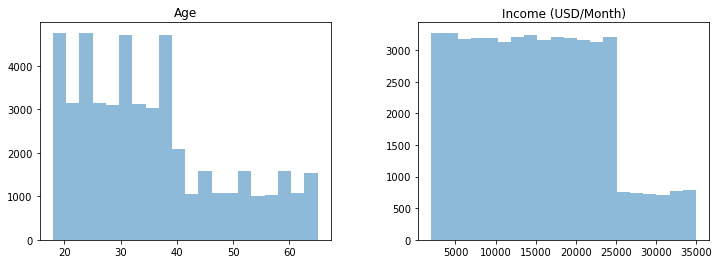

In [17]:
IDs = ["Customer ID", "Transaction ID"]
display( Missing_values(Customer_Data) )

display( Statistical_description(Customer_Data.loc[:, ~Customer_Data.columns.isin(IDs)]) )

temp_df = Customer_Data.loc[:, ~Customer_Data.columns.isin(IDs)]
temp_df = temp_df[sorted(temp_df.columns.tolist())]
temp_df = temp_df[numeric_cols(temp_df)]
temp_df.hist(bins=20, alpha=0.5,figsize=[12,4],grid=False) if len(numeric_cols(temp_df)) > 0 else "no numeric column to plot"

The distribution of the *Age* and *Income* is moderatly skewed : we could think about making a transformation also !

Gender
Cardinality : ['Male' 'Female']
Unique counts : 2


<AxesSubplot:xlabel='Gender'>

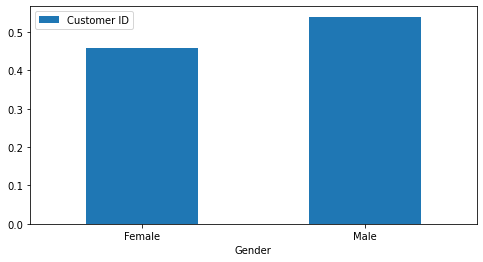

In [18]:
col = 'Gender'
Cardinality = Customer_Data[col].unique()
print(col)
print("Cardinality : {}".format(Cardinality) )
print("Unique counts : {}".format(len(Cardinality)) )

df = Customer_Data.pivot_table(values = ['Customer ID'], index=['Gender'],
                          #columns=['Gender'],
                          aggfunc=len
                         )/len(Customer_Data)
df = df.sort_values('Customer ID')
df.plot( kind='bar', rot=0, figsize=(8,4) )

Considering the sex, there is nearly as many *male* than *female* users.

## Transaction_Data <a class="anchor" id="Transaction_Data"></a>

This table makes the mapping between *transactions* and *customers* and their *payment mode*.

In [19]:
Transaction_Data.head(3)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash


In [20]:
IDs = ["Customer ID", "Transaction ID"]
display( Missing_values(Transaction_Data) )

display( Statistical_description(Transaction_Data.loc[:, ~Transaction_Data.columns.isin(IDs)]) )


temp_df = Transaction_Data.loc[:, ~Transaction_Data.columns.isin(IDs)]
temp_df = temp_df[sorted(temp_df.columns.tolist())]
temp_df = temp_df[numeric_cols(temp_df)]
temp_df.hist(bins=20, alpha=0.5,figsize=[12,4],grid=False) if len(numeric_cols(temp_df)) > 0 else "no numeric column to plot"

,Dtype,Count,Missing_Values,% Missing_Values
Customer ID,int64,440098,0,0.0
Payment_Mode,object,440098,0,0.0
Transaction ID,int64,440098,0,0.0


,count,range,IQR,mode,mad,kurtosis,skewness,mean,std,min,25%,50%,75%,max


'no numeric column to plot'

Payment_Mode
Cardinality : ['Card' 'Cash']
Unique counts : 2


<AxesSubplot:xlabel='Payment_Mode'>

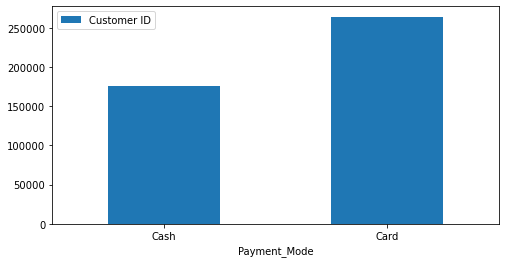

In [21]:
col = 'Payment_Mode'
Cardinality = Transaction_Data[col].unique()
print(col)
print("Cardinality : {}".format(Cardinality) )
print("Unique counts : {}".format(len(Cardinality)) )

df = Transaction_Data.pivot_table(values = ['Customer ID'], index=['Payment_Mode'],
                          #columns=['Gender'],
                          aggfunc=len
                         )
df = df.sort_values('Customer ID')
df.plot( kind='bar', rot=0, figsize=(8,4) )

*Card* payment is the most used payment mode.

# Relationship across the files <a class="anchor" id="FilesRelationship"></a>

To sum up, here is an **entity relationship schema** between the datas that I have created.

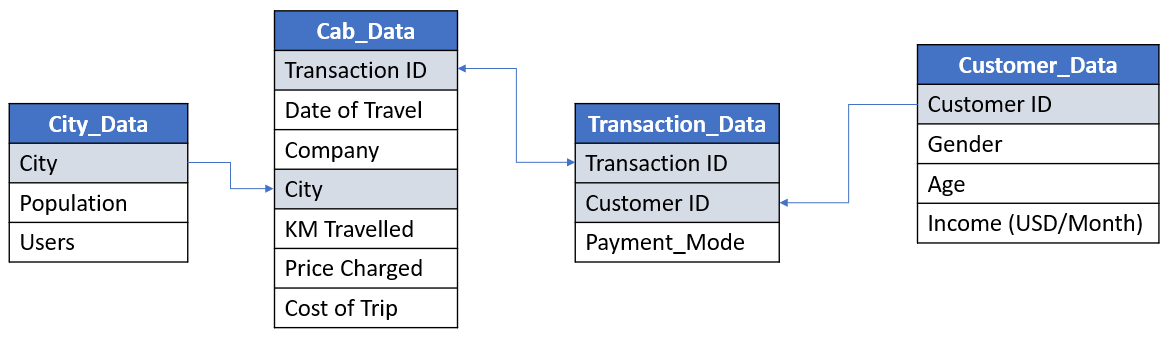

In [22]:
from IPython.display import Image
Image("Data_Relations.PNG")

# Master Dataset <a class="anchor" id="Final_Dataset"></a>

Here, we will merge our datas, to get a dataset that will be used for further insights

### Merging Cab and City datasets

In [23]:
Cab_City_Data = pd.merge(Cab_Data,City_Data,on='City',how='left')

#Statistical_description(Cab_City_Data.loc[:, ~Cab_City_Data.columns.isin(IDs)])

### Merging Transactions and Customers datasets

In [24]:
Customer_Transaction_Data = pd.merge(Transaction_Data,Customer_Data, on='Customer ID',how='left')#.head(3)
#Statistical_description(Customer_Transaction_Data.loc[:, ~Customer_Transaction_Data.columns.isin(IDs)])

### Final merge

In [25]:
Dataset = pd.merge(Cab_City_Data,Customer_Transaction_Data, on='Transaction ID',how='inner')#.head(3)

In [26]:
Statistical_description(Dataset)

,count,range,IQR,mode,mad,kurtosis,skewness,mean,std,min,25%,50%,75%,max
Age,359392,47.00,17.00,23.00,8.00,-0.46,0.69,35.34,12.59,18.00,25.00,33.00,42.00,65.00
Cost of Trip,359392,672.20,262.48,362.88,131.23,-1.01,0.14,286.19,157.99,19.00,151.20,282.48,413.68,691.20
Cost per KM,359392,4.40,1.68,12.00,0.84,-0.57,-0.52,12.68,1.17,10.00,12.00,12.84,13.68,14.40
Customer ID,359392,59999.00,33373.00,494.00,6362.00,-0.89,0.88,19191.65,21012.38,1.00,2705.00,7459.00,36078.00,60000.00
Gross Profit,359392,1684.03,162.02,31.00,65.69,4.38,1.90,137.25,160.31,-220.06,28.01,81.96,190.03,1463.97
Income (USD/Month),359392,33000.00,12611.00,20884.00,6304.00,-0.66,0.31,15048.82,7969.40,2000.00,8424.00,14685.00,21035.00,35000.00
KM Travelled,359392,46.10,20.96,33.60,10.45,-1.13,0.06,22.57,12.23,1.90,12.00,22.44,32.96,48.00
Margin,359392,1.46,0.28,0.28,0.14,-0.46,-0.10,0.27,0.19,-0.69,0.14,0.26,0.42,0.76
Month of Travel,359392,11.00,5.00,12.00,3.00,-1.05,-0.40,7.50,3.45,1.00,5.00,8.00,10.00,12.00
Population,359392,8156869.00,7734599.00,8405837.00,1049261.00,-1.06,0.91,3132198.04,3315189.78,248968.00,671238.00,1595037.00,8405837.00,8405837.00


In [27]:
def Correlation_graph(dataframe,colonnes,cmap="coolwarm",figsize=[10,10],triu=1):
    cor = dataframe[colonnes].corr()
    if triu==1:
        mask=np.triu(np.ones_like(cor, dtype=bool)) 
    else:
        mask=None

    fig, ax = plt.subplots( figsize=(figsize[0],figsize[1]) ) 
    sns_plot = sns.heatmap(cor, square = True, 
            center=0,cmap=cmap,
            linewidths=.5,annot=True,
            mask=mask,
            vmin=-1, vmax=1 )

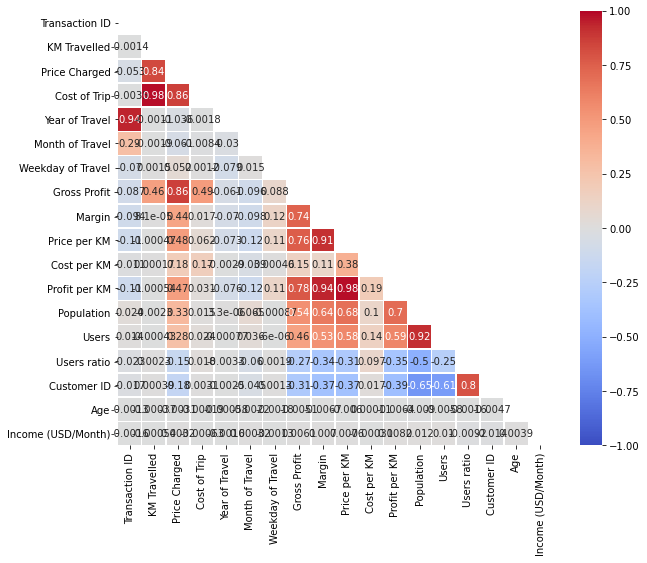

In [28]:
Correlation_graph(Dataset,Dataset.columns.tolist(), figsize=[10,8])

**We will use dummy variables for the machine learning modelisation**

In [29]:
Gender_dummies = pd.get_dummies(Dataset.Gender)
Company_dummies = pd.get_dummies(Dataset.Company)
#Company_dummies.columns = ['Pink Cab','Yellow Cab']
City_dummies = pd.get_dummies(Dataset.City)
Payment_Mode_dummies = pd.get_dummies(Dataset.Payment_Mode)

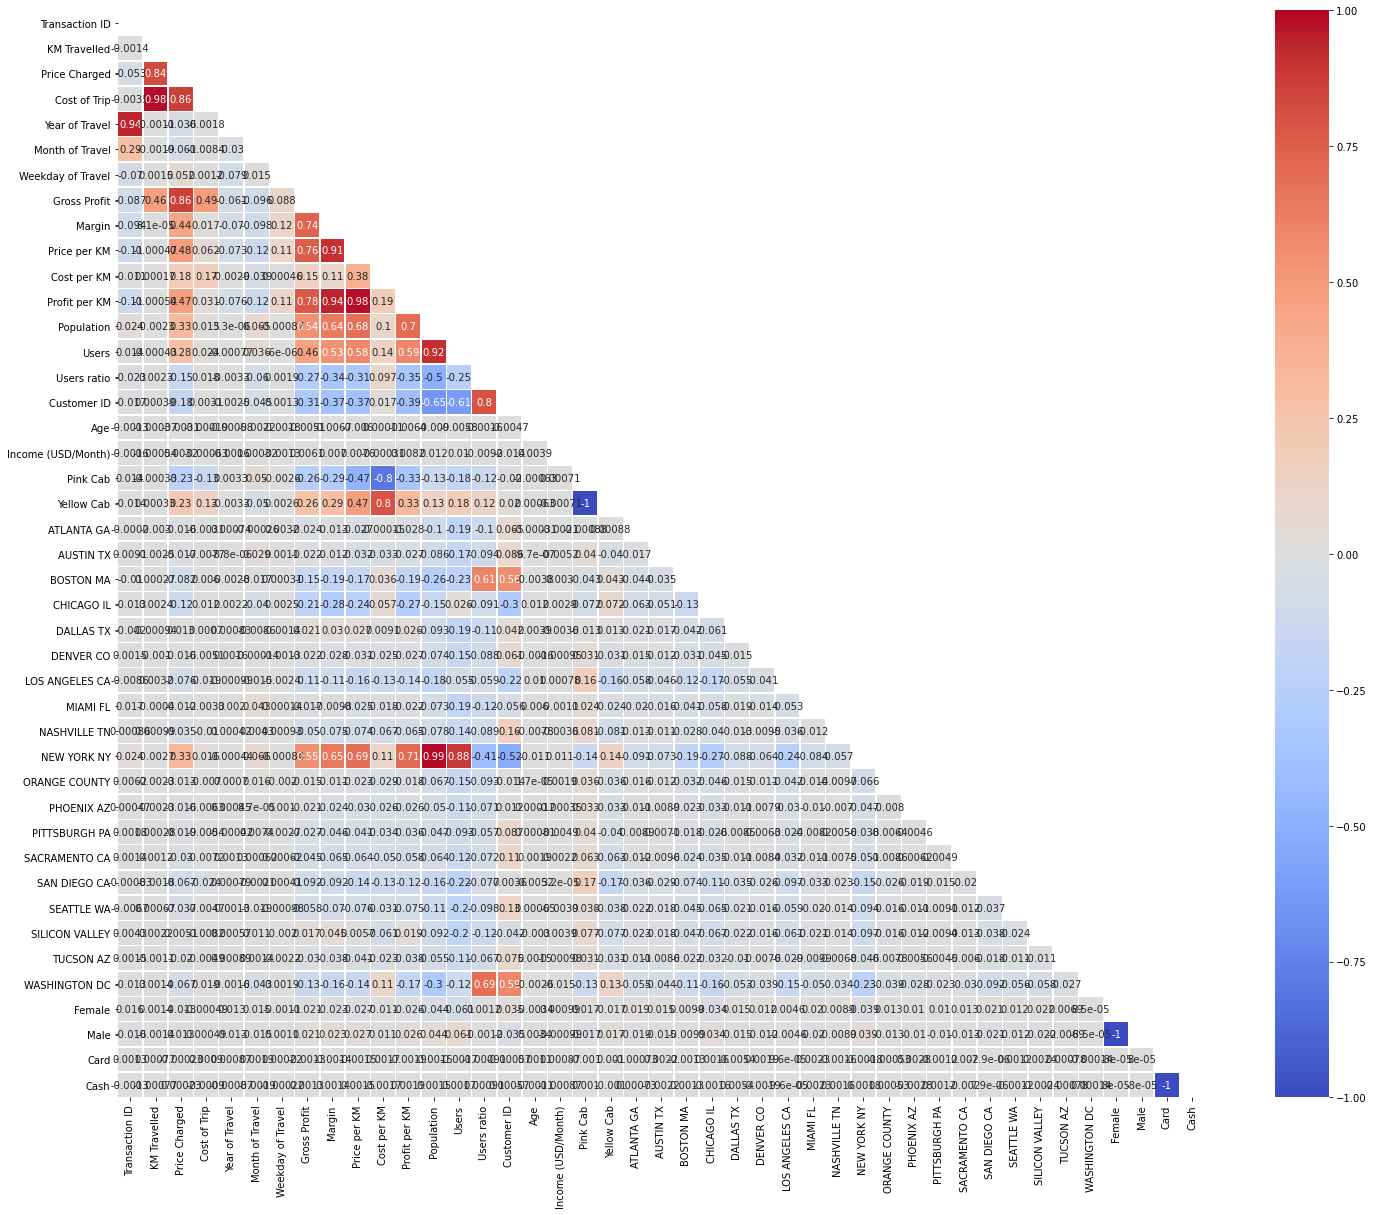

In [30]:
df_dummy = pd.concat([Dataset,Company_dummies,City_dummies,Gender_dummies,Payment_Mode_dummies],
                     axis=1).drop(['Company','City','Gender','Payment_Mode'], axis=1)
Correlation_graph(df_dummy,df_dummy.columns.tolist(), figsize=[25,20])

<br><br>

# Hypothesis <a class="anchor" id="Hypothesis"></a>

1. [The price charged varies depending on the city ?](#Hypothesis_1) 
2. [Females are more fund to use pink cab](#Hypothesis_2) 
3. [Which company has the most loyal clients ?](#Hypothesis_3) 
4. [Does margin proportionally increase with increase in number of customers?](#Hypothesis_4) 
5. [Is there a difference of margin due to gender ?](#Hypothesis_5) 

## Hypothesis 1 : The price charged and profit depend on the city<a class="anchor" id="Hypothesis_1"></a>

In [32]:
City_Company_df = Dataset.groupby(["City","Company"]
                                 ).agg({"Users":np.mean,"Population":np.mean,"Users ratio":np.mean,
                                        "Customer ID":len,"Cost per KM":np.mean,
                                        "Profit per KM":np.mean,"Price per KM":np.mean
                                       }).reset_index()
City_Company_df = City_Company_df.rename(columns={'Customer ID':'Transactions','Users':'Demand'})

City_Company_unique_users = Dataset.groupby(["City","Company"])["Customer ID"].nunique().reset_index()
City_Company_unique_users = City_Company_unique_users.rename(columns={'Customer ID':'Users'})

City_Company_df = City_Company_df.merge(City_Company_unique_users,on=["City","Company"])
City_Company_df.head(3)

,City,Company,Demand,Population,Users ratio,Transactions,Cost per KM,Profit per KM,Price per KM,Users
0,ATLANTA GA,Pink Cab,24701,814885,0.030312,1762,10.994438,2.418367,13.412805,1322
1,ATLANTA GA,Yellow Cab,24701,814885,0.030312,5795,13.192918,5.793907,18.986825,2595
2,AUSTIN TX,Pink Cab,14978,698371,0.021447,1868,10.999197,3.601619,14.600816,1354


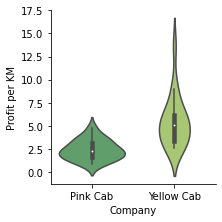

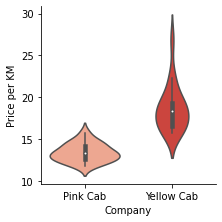

In [33]:
sns.catplot(x = "Company",y = "Profit per KM",
            data = City_Company_df,
            kind = "violin",palette='summer',
            split = True,height=3)

sns.catplot(x = "Company",y = "Price per KM",
            data = City_Company_df,
            kind = "violin",palette='Reds',
            split = True,height=3)

**Interpretation :** The Profit per KM is more likely to be **twice more** for the **Yellow Cab** company than **Pink Cab**

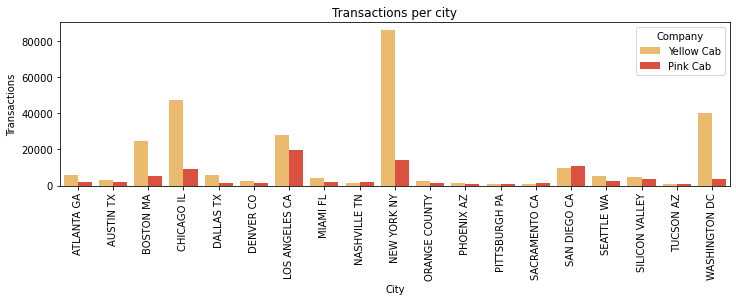

In [34]:
plt.figure(figsize=(12,3))
sns.barplot(x= 'City', y="Transactions",
            hue="Company",data=City_Company_df,
            hue_order=['Yellow Cab','Pink Cab'],palette='YlOrRd')     
plt.title('Transactions per city')
plt.xticks(rotation=90)
plt.show()

In [35]:
df = City_Company_df.groupby(['City','Company']).agg({'Price per KM':np.mean}).reset_index()
df = df.sort_values('Price per KM',ascending=True)
Statistical_description(df)

,count,range,IQR,mode,mad,kurtosis,skewness,mean,std,min,25%,50%,75%,max
Price per KM,38,15.07,4.86,11.81,2.52,1.16,1.05,16.04,3.3,11.81,13.34,15.79,18.2,26.88


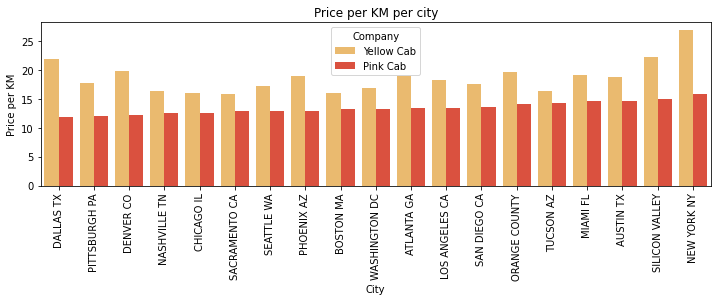

In [36]:
plt.figure(figsize=(12,3))
sns.barplot(x= 'City', y="Price per KM",
            hue="Company",data=df,
            hue_order=['Yellow Cab','Pink Cab'],palette='YlOrRd')     
plt.title('Price per KM per city')
plt.xticks(rotation=90)
plt.show()

**Interpretation :** It seems that **Pink Cab** (on the contrary of **Yellow cab**) doesn't have any particular pricing regarding of the city.

In [37]:
df = City_Company_df.groupby(['City','Company']).agg({'Profit per KM':np.mean}).reset_index()
df = df.sort_values('Profit per KM',ascending=True)
Statistical_description(df)

,count,range,IQR,mode,mad,kurtosis,skewness,mean,std,min,25%,50%,75%,max
Profit per KM,38,12.86,2.72,0.83,1.36,3.97,1.75,3.94,2.52,0.83,2.34,3.23,5.06,13.68


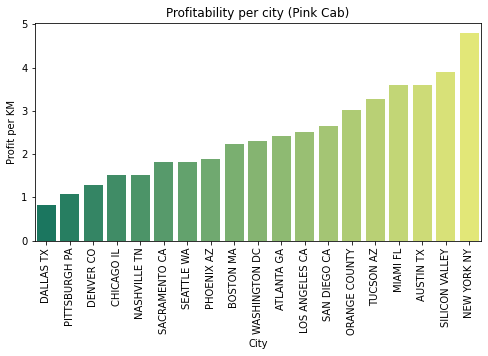

In [38]:
Cab = 'Pink Cab'
df = City_Company_df[City_Company_df["Company"]==Cab].groupby('City').agg({'Profit per KM':np.mean}).reset_index()
df = df.sort_values('Profit per KM',ascending=True)

plt.figure(figsize=(8,4))
sns.barplot(x= 'City', y="Profit per KM",data=df,palette='summer')     
plt.title('Profitability per city ({})'.format(Cab) )
plt.xticks(rotation=90)
plt.show()

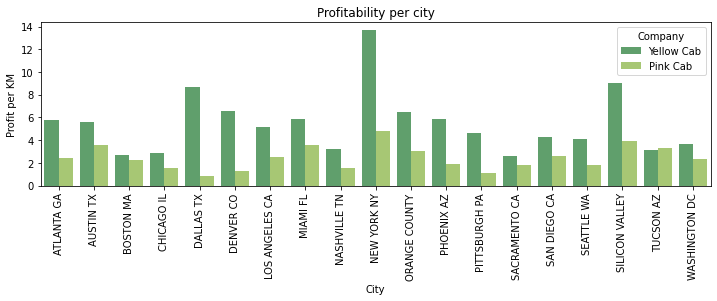

In [39]:
plt.figure(figsize=(12,3))
sns.barplot(x= 'City', y="Profit per KM",
            hue="Company",data=City_Company_df,
            hue_order=['Yellow Cab','Pink Cab'],palette='summer')     
plt.title('Profitability per city')
plt.xticks(rotation=90)
plt.show()

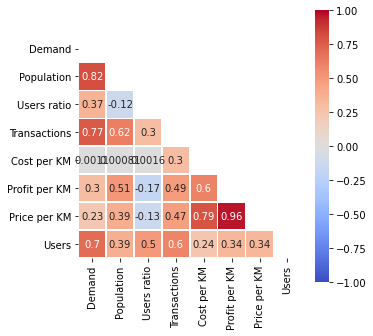

In [40]:
Correlation_graph(
    City_Company_df,
    City_Company_df.columns.tolist(),figsize=[5,5])

**Interpretation :** The Profit per KM is highly correlated with the Price per KM.

 <br>

## Hypothesis 2 : Females are more fund to use pink cab<a class="anchor" id="Hypothesis_2"></a>

<AxesSubplot:xlabel='Company', ylabel='Users_%'>

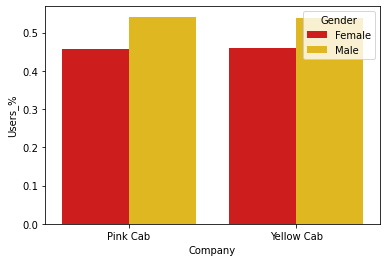

In [41]:
df = Dataset.groupby(["Gender","Company"])["Customer ID"].nunique().reset_index()
df = df.rename(columns={"Customer ID":"Users"})
df = df.merge(df.groupby(["Company"])["Users"].sum().reset_index(), on ='Company')
df["Users_%"] =  df["Users_x"]/df["Users_y"]
sns.barplot(x='Company',y='Users_%',hue='Gender',data=df,palette='hot')

In [42]:
from scipy.stats import chi2_contingency

cols = ['Company','Gender']
table = pd.crosstab(Dataset[cols[0]], Dataset[cols[1]], margins=True)
stat, p_value, dof, expected = chi2_contingency(table)
print("stat = {}, p_value = {}, degree of freedom = {}".format(stat, p_value, dof)),print()

threeshold = 0.05
print('Null hypothesis : {} and {} are independants'.format(cols[0],cols[1]))

if p_value < threeshold:
    print("The p_value is less than {} : The null hypothesis is rejected".format(threeshold))
else :
    print("""The p_value is greater than {} : 
    The null hypothesis is accepted: The variables are independants of each other
    """.format(threeshold))

stat = 107.3029246342706, p_value = 2.735695503153745e-22, degree of freedom = 4

Null hypothesis : Company and Gender are independants
The p_value is less than 0.05 : The null hypothesis is rejected


 <br>

## Hypothesis 3 : Which company has the most loyal clients ? <a class="anchor" id="Hypothesis_3"></a>

In [43]:
cust_loyalty_by_company = Dataset.groupby(['Customer ID','Year of Travel','Company']).agg(
    {'Transaction ID':len,'Income (USD/Month)':np.mean,'Gross Profit':np.sum,'Margin':np.mean}).reset_index()
cust_loyalty_by_company = cust_loyalty_by_company.rename(columns={'Transaction ID':'Usage'})

cust_loyalty = Dataset.groupby(['Customer ID','Year of Travel']).agg(
    {'Transaction ID':len,'Gross Profit':np.sum}).reset_index()
cust_loyalty = cust_loyalty.rename(
    columns={'Transaction ID':'Total Usage','Gross Profit':'Total Gross Profit',
             })

In [44]:
df = cust_loyalty_by_company.merge(cust_loyalty, on=['Customer ID','Year of Travel'])
df['Usage shares'] = (df['Usage']/df['Total Usage']).apply(lambda x : round(100*x,2))
df['Profit shares'] = (df['Gross Profit']/df['Total Gross Profit']).apply(lambda x : round(100*x,2))
#df['Margin shares'] = (df['Margin']/df['Total Margin']).apply(lambda x : round(100*x,2))

In [45]:
df.head(2)

,Customer ID,Year of Travel,Company,Usage,Income (USD/Month),Gross Profit,Margin,Total Usage,Total Gross Profit,Usage shares,Profit shares
0,1,2016,Pink Cab,1,16359,245.1700,0.348704,9,2853.4504,11.11,8.59
1,1,2016,Yellow Cab,8,16359,2608.2804,0.514957,9,2853.4504,88.89,91.41


<AxesSubplot:xlabel='Customer ID', ylabel='Usage'>

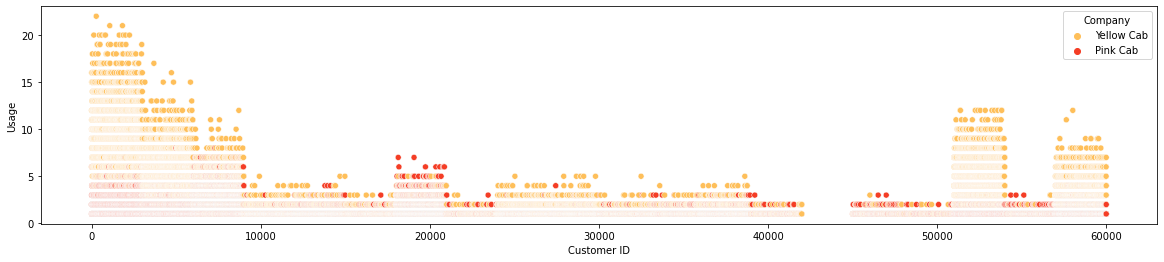

In [46]:
plt.figure(figsize=(20,4))
sns.scatterplot(data=df[df['Year of Travel']==2018], x="Customer ID", y="Usage", hue="Company",hue_order=['Yellow Cab','Pink Cab'],
    palette='YlOrRd')

In [47]:
Statistical_description(df[df['Company']=='Yellow Cab'][['Gross Profit','Income (USD/Month)','Margin','Usage']])

,count,range,IQR,mode,mad,kurtosis,skewness,mean,std,min,25%,50%,75%,max
Gross Profit,81196,9009.93,361.5,19.09,152.02,9.36,3.03,542.15,952.33,-176.93,89.19,216.00,450.69,8832.99
Income (USD/Month),81196,32996.00,12694.0,16512.00,6349.50,-0.66,0.32,15000.88,7995.44,2000.00,8315.00,14631.00,21009.00,34996.00
Margin,81196,1.31,0.2,0.30,0.10,-0.35,0.16,0.27,0.14,-0.55,0.16,0.25,0.37,0.76
Usage,81196,24.00,4.0,1.00,1.00,2.72,1.67,3.38,3.11,1.00,1.00,2.00,5.00,25.00


In [48]:
Statistical_description(df[df['Company']=='Pink Cab'][['Gross Profit','Income (USD/Month)','Margin','Usage']])

,count,range,IQR,mode,mad,kurtosis,skewness,mean,std,min,25%,50%,75%,max
Gross Profit,53704,1625.17,124.55,14.91,53.65,7.44,2.14,98.83,122.81,-220.06,17.61,62.82,142.16,1405.11
Income (USD/Month),53704,33000.00,12716.75,8756.00,6361.00,-0.67,0.31,15035.64,7997.89,2000.00,8338.50,14664.00,21055.25,35000.00
Margin,53704,1.43,0.18,0.29,0.09,1.02,-0.48,0.17,0.15,-0.69,0.08,0.18,0.27,0.73
Usage,53704,12.00,1.00,1.00,0.00,5.70,2.10,1.58,0.96,1.00,1.00,1.00,2.00,13.00


**Interpretation :** People use **Yellow Cabs** twice more than the **Pink Cab** ones and they are **five time more profitable**.<br>

<AxesSubplot:xlabel='Usage', ylabel='Income (USD/Month)'>

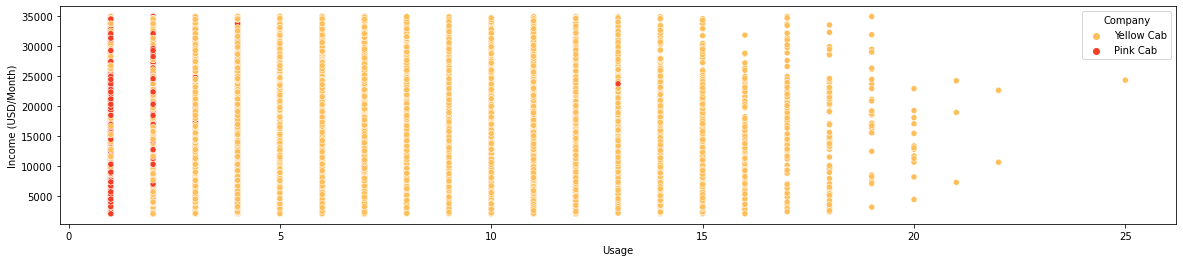

In [49]:
plt.figure(figsize=(20,4))
#df = cust_loyalty.groupby(['Customer ID','Company']).agg({'Income (USD/Month)':np.mean,'Usage':np.sum}).reset_index()
sns.scatterplot(data=df, x="Usage",y="Income (USD/Month)", hue="Company",hue_order=['Yellow Cab','Pink Cab'],
    palette='YlOrRd')

**Interpretation :** Having **high or low revenue** doesn't inpact the frequency of usage of the cab

### Common customers
We want to know how many customers had some transactions with both companies

In [50]:
temp_df = pd.DataFrame(columns=['Year','Company','Customers','Common Customers','% Common Customers'])

for year in Dataset['Year of Travel'].unique().tolist():
    df_2 = Dataset[(Dataset['Company']=='Yellow Cab') & (Dataset['Year of Travel']==year)]

    Pink_Customers = Dataset[(Dataset['Company']=='Pink Cab') & 
                             (Dataset['Year of Travel']==year)]['Customer ID'].unique().tolist()
    Yellow_Customers = Dataset[(Dataset['Company']=='Yellow Cab') & 
                               (Dataset['Year of Travel']==year)]['Customer ID'].unique().tolist()

    Common_Customers = df_2[df_2['Customer ID'].isin(Pink_Customers)]['Customer ID'].unique().tolist() 
    
    c1 = [year,year]
    c2 = ['Pink Cab','Yellow Cab']
    v1 = [len(Pink_Customers), len(Yellow_Customers)]
    v2 = [len(Common_Customers),len(Common_Customers)]
    v3 = [round(100*len(Common_Customers)/len(Pink_Customers),2), 
          round(100*len(Common_Customers)/len(Yellow_Customers),2)]

    dictio = {'Year':c1,'Company':c2,'Customers':v1,'Common Customers':v2,'% Common Customers':v3}
    temp_df = pd.concat([temp_df, pd.DataFrame(dictio) ])

df_2 = Dataset[Dataset['Company']=='Yellow Cab']
Pink_Customers = Dataset[(Dataset['Company']=='Pink Cab')]['Customer ID'].unique().tolist()
Yellow_Customers = Dataset[(Dataset['Company']=='Yellow Cab')]['Customer ID'].unique().tolist()
Common_Customers = df_2[df_2['Customer ID'].isin(Pink_Customers)]['Customer ID'].unique().tolist() 

c1 = ['All years','All years']
c2 = ['Pink Cab','Yellow Cab']
v1 = [len(Pink_Customers), len(Yellow_Customers)]
v2 = [len(Common_Customers),len(Common_Customers)]
v3 = [round(100*len(Common_Customers)/len(Pink_Customers),2), 
      round(100*len(Common_Customers)/len(Yellow_Customers),2)]
dictio = {'Year':c1,'Company':c2,'Customers':v1,'Common Customers':v2,'% Common Customers':v3}
Common_Cust_df = pd.concat([temp_df, pd.DataFrame(dictio) ])
Common_Cust_df.head(3)

,Year,Company,Customers,Common Customers,% Common Customers
0,2016,Pink Cab,16661,11446,68.70
1,2016,Yellow Cab,25937,11446,44.13
0,2017,Pink Cab,18643,13014,69.81


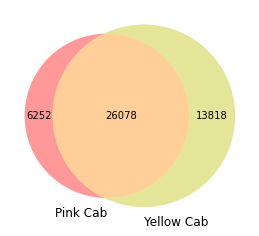

In [51]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

dictio = {}
for x in Common_Cust_df['Year'].unique().tolist():
    subsets =  (Common_Cust_df[Common_Cust_df['Year']==x]['Customers'] - 
                Common_Cust_df[Common_Cust_df['Year']==x]['Common Customers']).values.tolist() 
    subsets+= Common_Cust_df[Common_Cust_df['Year']==x]['Common Customers'].unique().tolist()
    dictio[x] = subsets
    
venn2(subsets = dictio['All years'], set_labels = ('Pink Cab', 'Yellow Cab'),set_colors=('r', 'y'))
plt.show()
#venn2(subsets = dictio[2016], set_labels = ('Pink Cab', 'Yellow Cab'),set_colors=('r', 'y') )
#plt.show()
#venn2(subsets = dictio[2017], set_labels = ('Pink Cab', 'Yellow Cab'),set_colors=('r', 'y') )


**Interpretation :** 80% of Pink Cab users also took Yellow cab.

In [52]:
temp_df = df.groupby(['Company','Year of Travel','Usage']).agg({'Customer ID':len}).reset_index()
temp_df = temp_df.rename(columns={'Customer ID':'Customers'})

temp_df2 = pd.DataFrame(columns=['% Customers'])
for c in temp_df['Company'].unique().tolist():
    temp_df_index = temp_df[temp_df['Company']==c].index.tolist()
    lst = []
    for x in temp_df['Year of Travel'].unique().tolist():
        cust = temp_df[(temp_df['Company']==c)&(temp_df['Year of Travel']==x)]['Customers']
        lst +=( 100*cust.values/cust.sum() ).tolist()
   
    temp_df2 = pd.concat([temp_df2, 
                          pd.DataFrame({'index':temp_df_index,'% Customers':lst}).set_index('index')
                         ])
temp_df = pd.concat([temp_df,temp_df2],axis=1)

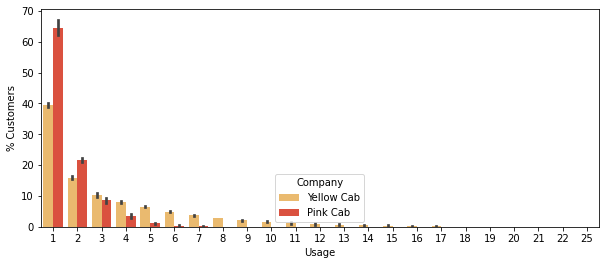

In [53]:
plt.figure(figsize=(10,4))
ax = sns.barplot(x= 'Usage', y="% Customers",
                 hue='Company',data=temp_df,
                 hue_order=['Yellow Cab','Pink Cab'], palette='YlOrRd')  

**Interpretation :** 80% of Pink Cab users also took Yellow cab.60% of Yellow Cab users took it at least twice over the last 3 years.<br> Only 36% of Pink Cab users took it at least twice.

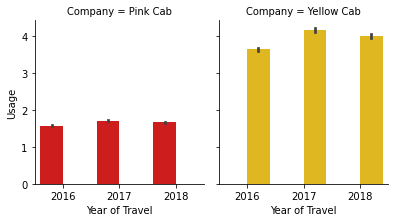

In [54]:
g = sns.catplot(x="Year of Travel", y="Usage",
                col="Company", hue="Company",
                data=df[df['Customer ID'].isin(Common_Customers)], kind="bar",palette="hot",
                height=3, aspect=.9);

**Interpretation :** People use Yellow Cabs twice more than the Pink Cab ones

 <br>

## Hypothesis 4 : Does margin proportionally increase with increase in number of customers? <a class="anchor" id="Hypothesis_4"></a>

In [55]:
df = Dataset.groupby(['Year of Travel','Date of Travel','Company']).agg({'Customer ID':len,'Margin':np.mean}).reset_index()
df = df.rename(columns={'Customer ID':'Number of customer'})
df.head(2)

,Year of Travel,Date of Travel,Company,Number of customer,Margin
0,2016,2016-01-02,Pink Cab,41,0.280835
1,2016,2016-01-02,Yellow Cab,140,0.494797


In [56]:
for x in ['Pink Cab','Yellow Cab']:
    print(x)
    print( df[df['Company']==x][['Number of customer','Margin']].corr() )
    print()

Pink Cab
                    Number of customer    Margin
Number of customer            1.000000  0.472758
Margin                        0.472758  1.000000

Yellow Cab
                    Number of customer    Margin
Number of customer            1.000000  0.180623
Margin                        0.180623  1.000000



<AxesSubplot:xlabel='Number of customer', ylabel='Margin'>

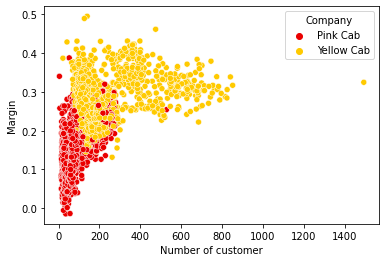

In [57]:
sns.scatterplot(
    data=df, x="Number of customer", y="Margin", 
    hue="Company",hue_order=['Pink Cab','Yellow Cab'],
    palette='hot')

**Interpretation :**  The correlation between the **Margin** and the **Number of customers** depends on the company :
- **Pink Cab :** moderated correlation ~48%
- **Yellow Cab :** low correlation ~18%

The **Number of customers** is moderatly positively correlated with the **Margin** particularly for **Pink Cab**.

 <br>

## Hypothesis 5 : Is there a difference of margin due to gender ? <a class="anchor" id="Hypothesis_5"></a>

In [58]:
df = Dataset.groupby(['Year of Travel','Gender','Age','Payment_Mode','Company'
                     ]).agg({'Margin':np.mean,'Gross Profit':np.mean,'KM Travelled':np.mean}).reset_index()
df.head(1)

,Year of Travel,Gender,Age,Payment_Mode,Company,Margin,Gross Profit,KM Travelled
0,2016,Female,18,Card,Pink Cab,0.200167,71.037577,21.713784


We will check if there is difference of margin between *Male* and *Female* depending on the company.<br>
**Null hypothesis :** The margin doesn't depend on the gender.

### Pink Cab

In [59]:
from scipy.stats import ttest_ind

group1 = df[(df['Gender']=='Male') & (df['Company']=='Pink Cab')]
group2 = df[(df['Gender']=='Female') & (df['Company']=='Pink Cab')]
stat, p_value = ttest_ind(group1['Margin'], group2['Margin'])

threeshold = 0.05
print(p_value)
if p_value < threeshold:
    print("The p_value is less than {} : The null hypothesis is rejected - The difference is statistically significant".format(threeshold))
else :
    print("""The p_value is greater than {} : 
    The null hypothesis is accepted: There is no statistical difference
    """.format(threeshold))

0.2034231538677294
The p_value is greater than 0.05 : 
    The null hypothesis is accepted: There is no statistical difference
    


**Interpretation :** **Pink Cab** company doesn't have a difference in margin regarding the gender of its customer.

### Yellow Cab

In [60]:
from scipy.stats import ttest_ind

group1 = df[(df['Gender']=='Male') & (df['Company']=='Yellow Cab')]
group2 = df[(df['Gender']=='Female') & (df['Company']=='Yellow Cab')]

stat, p_value = ttest_ind(group1['Margin'], group2['Margin'])

threeshold = 0.05
print(p_value)
if p_value < threeshold:
    print("The p_value is less than {} : The null hypothesis is rejected - The difference is statistically significant".format(threeshold))
else :
    print("""The p_value is greater than {} : 
    The null hypothesis is accepted: There is no statistical difference
    """.format(threeshold))

1.3692047935759329e-05
The p_value is less than 0.05 : The null hypothesis is rejected - The difference is statistically significant


**Interpretation :** There is difference in margin between *Male* and *Female* for the **Yellow Cab** company .

In [61]:
df_yellow = df[df['Company']=='Yellow Cab']

In [62]:
df_yellow[["Year of Travel","Margin","KM Travelled"]].corr().round(2)

,Year of Travel,Margin,KM Travelled
Year of Travel,1.00,-0.51,-0.04
Margin,-0.51,1.00,0.04
KM Travelled,-0.04,0.04,1.00


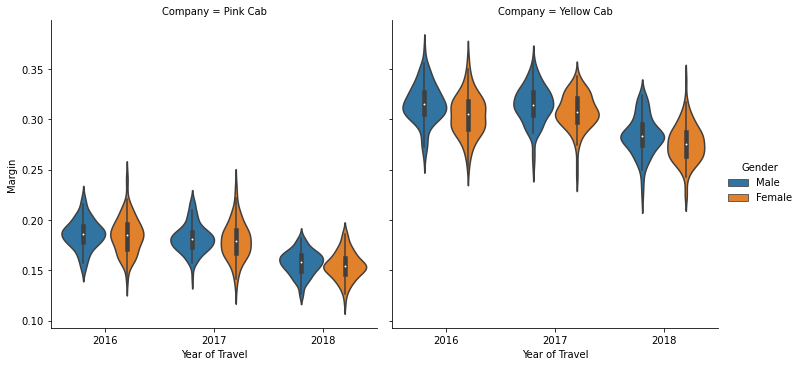

In [63]:
sns.catplot(x = "Year of Travel",y = "Margin",hue="Gender",col='Company',hue_order=['Male','Female'],
            data = df, #df_yellow
            kind = "violin",
            split = False,height=5)

**Interpretation :** **Yellow Cab** **male** users generate more margin than **female** users.<br>
Globally, **Yellow Cab** margin decreases with the year : The margin is negatively correlated (**-0.51**) with the year.<br> 
The **KM Travelled** doesn't seem to have a lot of influence on the **margin**

<AxesSubplot:xlabel='KM Travelled', ylabel='Margin'>

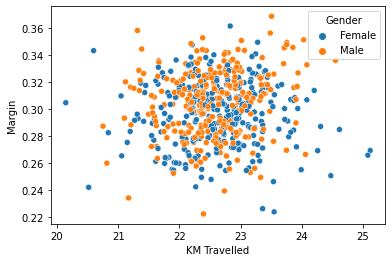

In [64]:
sns.scatterplot(
    data=df_yellow, x="KM Travelled", y="Margin", 
    hue="Gender")

## Hypothesis 6: Cab services are more expensive on week-ends <a class="anchor" id="Hypothesis_6"></a>

In [65]:
Dataset.pivot_table(index="Company", columns="Weekday of Travel", values="Price per KM",aggfunc=np.mean)

Weekday of Travel,1,2,3,4,5,6,7
Company,,,,,,,
Pink Cab,13.11635,13.113742,13.122137,13.112653,14.057252,13.999540,14.392565
Yellow Cab,19.40085,19.337956,19.335049,19.306508,20.719723,20.632747,21.232040


<Figure size 1440x720 with 0 Axes>

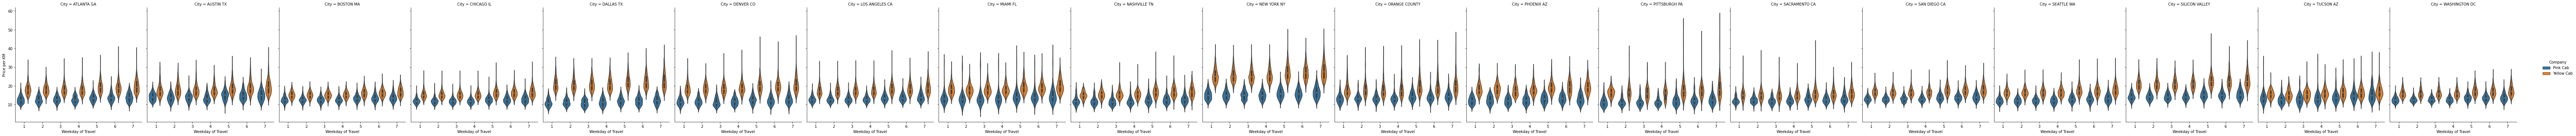

In [66]:
plt.figure(figsize=(20, 10))
sns.catplot(x = "Weekday of Travel",
            y = "Price per KM",
            hue = "Company",
            col = "City",
            data = Dataset,
            kind = "violin",
            split = False)

**Interpretation :** The cab services cost more on Week-ends and there is a little difference in pricing distribution regarding the city. Companies tend gradually increases their charges from Monday to Sunday.

<AxesSubplot:xlabel='Weekday of Travel', ylabel='Price per KM'>

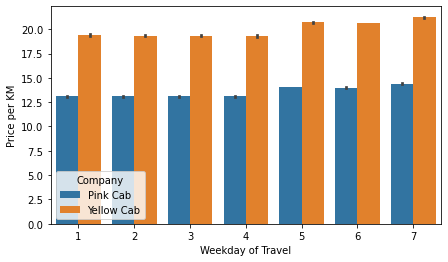

In [67]:
plt.figure(figsize=(7, 4))
sns.barplot(x = "Weekday of Travel",
            y = "Price per KM",
            hue = "Company",
            data = Dataset
           )

# Other explorations 

#### Most profitable city

In [68]:
Dataset.groupby(['City']).agg({'Gross Profit':np.sum}
                             ).reset_index().sort_values('Gross Profit',ascending=False).iloc[0]

City              NEW YORK NY
Gross Profit    27962555.1592
Name: 9, dtype: object

#### Profit per Company

In [69]:
df = Dataset.groupby(['Year of Travel','Company']).agg({'Gross Profit':np.sum}).reset_index()
df.groupby(['Company']).agg({'Gross Profit':np.sum}).reset_index()

,Company,Gross Profit
0,Pink Cab,5.307328e+06
1,Yellow Cab,4.402037e+07


#### Profit other the years

<AxesSubplot:xlabel='Year of Travel', ylabel='Gross Profit'>

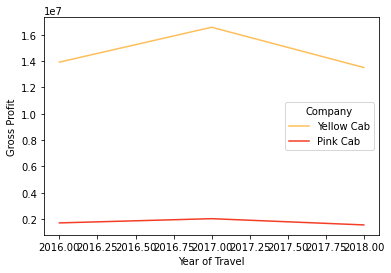

In [70]:
sns.lineplot(x='Year of Travel',y='Gross Profit',hue='Company',data=df,hue_order=['Yellow Cab','Pink Cab'],
    palette='YlOrRd')

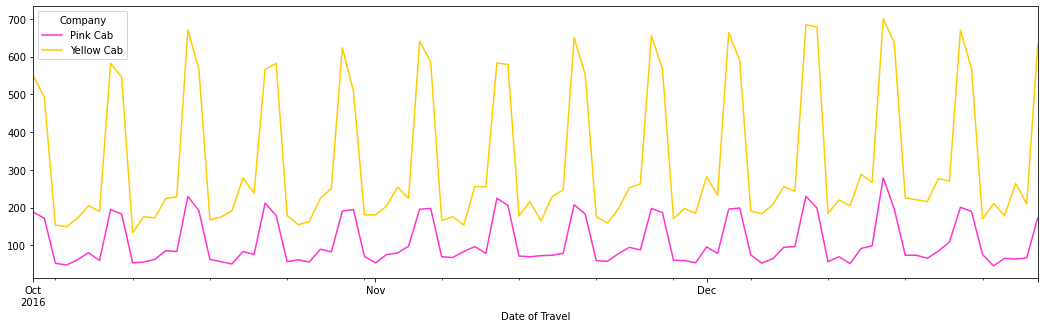

In [71]:
df = Dataset[(Dataset['Month of Travel']>=10) & (Dataset['Year of Travel']==2016)].reset_index()
df = df.pivot_table(index="Date of Travel", columns="Company", values="Transaction ID",aggfunc=len)

df.plot( color = ['#FF33CC', '#FFCC00'],figsize=(18, 5));

<br><br>

# EDA recommendation  <a class="anchor" id="Recos"></a>

After having explored the dataset, here are the declining conclusions we have :
1. **Profitability :** In term of profitability, Yellow Cab is 8 times more profitable than Pink Cab
    1. On the last 3 years, **Pink Cab** made *5.307.328* and **Yellow Cab**, *44.020.373*
    2. **NEW YORK NY** is the most profitable city (*27.962.555*) for both **Pink** and **Yellow Cabs**


2. **Gender :** There is nearly as many women as men | *~46%* of women and *~54%* of men . Company and Gender are independants.


3. **Pricing :** **Yellow Cab** proposes a very flexible **Pricing per KM** depending on lots of features like the City, the Gender; which is not the case of **Pink Cab** which doesn't.<br> 
From Friday to Sunday, the cab services are more expensive than the other days. <br>**Pink Cab** is the least expensive company among both companies (~3 times less on workdays and 2.5 times from Friday to Sunday)


4. **Loyalty :** Having high or low revenue doesn't inpact the frequency of usage of the cabs. **Yellow Cab** is the most used company.


5. **Margin :** The more **Pink Cab** has some users, the more it increases its margin. It's not the case for **Yellow Cab**.<br>
Both of the companies lost some margin other the years.


6. **Periodicity :** The distribution of the transactions according to the *date of travel* looks like a *time serie* with these properties :
    1. **Periodicity :** 1 year 
    2. **Slope :** Positive 
    3. **Noise :** High<br>
    We have another *time serie* when we look at the level of the week, we have another time serie which shares the same properties (**Periodicity :** 7 days,  **Slope :** Positive, **Noise :** Low)
 

### Conclusion
The market is clearly in favor of the **Yellow Cab** company, even if during the last year, its *gross profit* has gotten a little decrease. <br>
*XYZ* should invest in **Yellow Cab** due to its market implantation. It *XYZ*, wants to invest in a company with great potential, it look to **Pink Cab**